<a href="https://colab.research.google.com/github/JackCollins1991/GoogleColabs/blob/LogisticRegressionAssumptions/LogisticRegressionAssumptionsHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
from copy import deepcopy
!pip install factor_analyzer
!pip install seaborn
!pin install itertools

import itertools as it

import seaborn as sb
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Turn interactive plotting off
plt.ion()

pd.set_option('display.max_columns', None)

/bin/bash: pin: command not found


In [215]:
def TestClassBalance(dependant):
  p = plt.bar(dependant, height = max(dependant.value_counts()))
  return p

def TestLinearityAssumption(predictors):
  
  return 

def TestOutliers(predictors, z_threshold):
  z_scores = scipy.stats.zscore(predictors)
  outliers = (z_scores > z_threshold).all(axis=1)
  return outliers

def TestMulticollinearity(predictors):
  vif_data = pd.DataFrame()
  vif_data["feature"] = predictors.columns
  vif_data["VIF"] = [variance_inflation_factor(predictors.values, i)
  for i in range(len(predictors.columns))]

  return vif_data

def TestCorrelations(predictors):
    heatmap = sb.heatmap(predictors.corr())
    return heatmap


In [216]:
predictors = data.select_dtypes(include='number')
dependant = data["class"]

<BarContainer object of 150 artists>

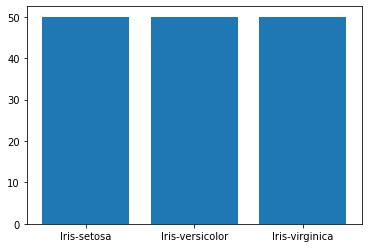

In [217]:
TestClassBalance(dependant)

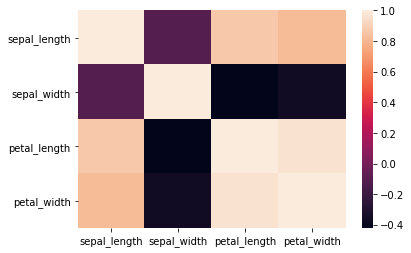

In [218]:
TestCorrelations(predictors)

In [219]:
TestMulticollinearity(predictors)

,feature,VIF
0,sepal_length,264.745711
1,sepal_width,97.111606
2,petal_length,173.968965
3,petal_width,55.488689


Cases with a z score above threshold are: 


,sepal_length,sepal_width,petal_length,petal_width
109,7.2,3.6,6.1,2.5
117,7.7,3.8,6.7,2.2


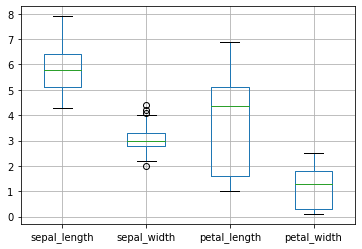

In [220]:
predictors.boxplot()
print("Cases with a z score above threshold are: ")
predictors[TestOutliers(predictors, z_threshold =1.1)]

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divid

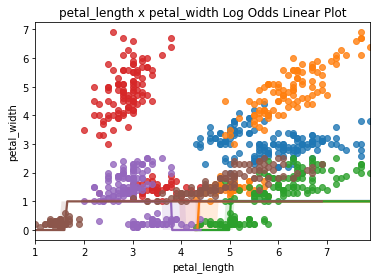

In [249]:
# Create a plot for each unique pair of predictors

combos = list(it.combinations(predictors,2))

fig, axs = plt.subplots(len(combos),1))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(len(combos)):
  pair = combos[i]
  axs[i] = sns.regplot(x= pair[0], y= pair[1], data= predictors, logistic= True).set_title(pair[0]+" x "+pair[1]+ " Log Odds Linear Plot")
  

  